<a href="https://colab.research.google.com/github/amanatid/Python_Tutorial_Torch/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
#Create a class model that inherits nn.Module
class Model(nn.Module):
  # Input Layer(4 features of the flower)  -->
  # Hidden Layer 1 (number of neurons) -->
  # H2(n)(hiden layer 2 of n number of neurons) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
      super().__init__() #instaniate our  nn.Model
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

  def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)

      return x


In [20]:
#pickup a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [23]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [24]:
#Change Columns Strings to Integers
my_df['variety']= my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',0.0)
my_df['variety'] = my_df['variety'].replace('Virginica',0.0)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [25]:
#Train and split! X , Y
X= my_df.drop('variety', axis=1)
y= my_df['variety']


In [26]:
#Convert these to numpy arrays
X= X.values
y= y.values

In [27]:
from sklearn.model_selection import  train_test_split

In [28]:
#Train Test Split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [29]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [30]:
#Converty labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
#set the criterion of model to measure the error, how far our predictions are from the data)
criterion = nn.CrossEntropyLoss()
#Choose Adam optimizer, lr = learning rate (if error doesn't go down after bunch of iterations(epochs), lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [33]:
#Train our Model
#Epochs?(one run through all the training data)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #measure loss/error gonna  be high at first
  loss = criterion(y_pred,y_train) #predicted values  vs the  y_train

  #keep track of our losess
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} and loss {loss}')
  #do some back propagation: take the error forward propagation and feed it back
  #thru the network and fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss 1.111958622932434
Epoch: 10 and loss 0.4949635863304138
Epoch: 20 and loss 0.039811693131923676
Epoch: 30 and loss 0.00198642467148602
Epoch: 40 and loss 0.00036021825508214533
Epoch: 50 and loss 0.00016599430819042027
Epoch: 60 and loss 0.00011908460146514699
Epoch: 70 and loss 0.00010286340693710372
Epoch: 80 and loss 9.564201172906905e-05
Epoch: 90 and loss 9.147161472355947e-05


In [43]:
x1= [1,2,3]
y1=[1,2,3]

Text(0.5, 0, 'Epoch')

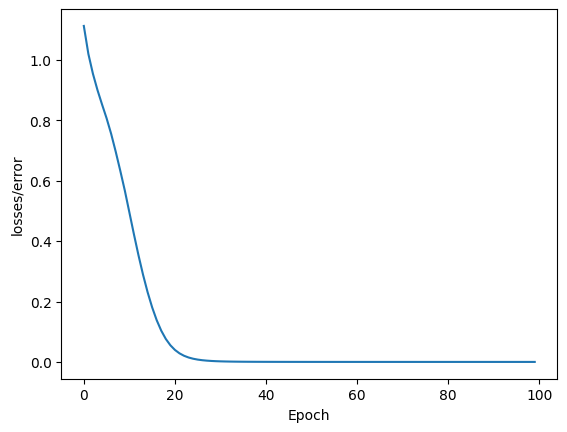

In [48]:
#Graph it out
plt.plot( range(epochs), losses)
plt.ylabel('losses/error')
plt.xlabel('Epoch')
